# How does the fringe transmission change on the sides of the PSF peak?
We perform here the same analysis as in Notebook 5, but for all point source observations throughout the different MIRI ground test campaigns.

## > Import modules

In [1]:
import funcs
import mrsobs

import numpy as np
from scipy.optimize import curve_fit
import scipy.interpolate as scp_interpolate
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '1A'
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')
ext_source_sci,ext_source_bkg       = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
ext_etal_source_sci,ext_etal_source_bkg     = mrsobs.FM_MTS_800K_BB_extended_source_through_etalon(lvl2path,band,etalon='ET1A')
intcal_source_sci                   = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
alphaMap = d2cMaps['alphaMap']
nslices   = d2cMaps['nslices']

# Get spectral resolution table
specres_table = funcs.get_cdps(cdpDir=cdpDir,band=band)[4]

In [4]:
ext_source_bkgsubtr    = ext_source_sci-ext_source_bkg
ext_etal_source_bkgsubtr   = ext_etal_source_sci-ext_etal_source_bkg

ext_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_source_bkgsubtr)
ext_etal_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_etal_source_bkgsubtr)
intcal_source_oddevencorr = funcs.OddEvenRowSignalCorrection(intcal_source_sci)

<IPython.core.display.Javascript object>


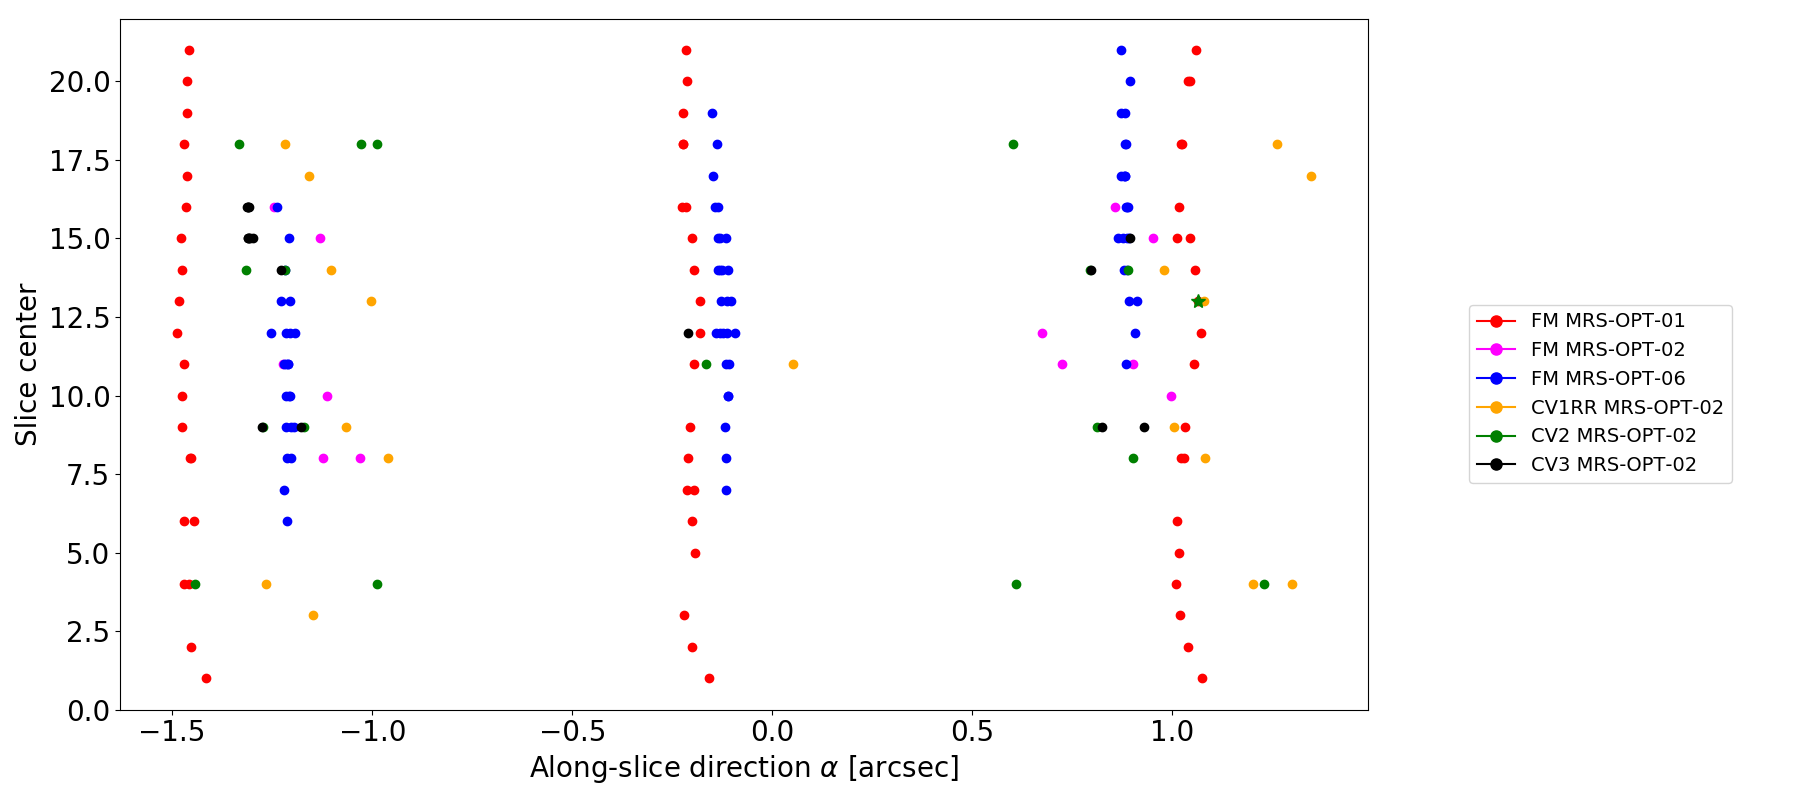

In [6]:
plt.figure(figsize=(18,8))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),FM_MRS_OPT_01_raster_centroid[key][0],'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),FM_MRS_OPT_02_centroid[key][0],'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),FM_MRS_OPT_06_leftraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),FM_MRS_OPT_06_middleraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),FM_MRS_OPT_06_rightraster_centroid[key][0],'bo')
for pointing in CV1RR_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][2])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),CV2_MRS_OPT_02_centroid[key][0],'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),CV3_MRS_OPT_02_centroid[key][0],'ko')
plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid['P36'][2][~np.isnan(FM_MRS_OPT_01_raster_centroid['P36'][2])]),FM_MRS_OPT_01_raster_centroid['P36'][0],'g*',markersize=10)
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel('Slice center')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='orange',label='CV1RR MRS-OPT-02',markerfacecolor='orange',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])

In [5]:
use_pointings,at_alpha_pos = [],[]
for sliceID in range(1,22):
    alpha_pos,pointings = [],[]
    for pointing in FM_MRS_OPT_01_raster_centroid.keys():
        if FM_MRS_OPT_01_raster_centroid[pointing][0] == sliceID:
            pointings.append(pointing)
            alpha_pos.append(np.mean(FM_MRS_OPT_01_raster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[pointing][2])]))
        else:
            continue
    idx = funcs.find_nearest(np.array(alpha_pos),0)
    use_pointings.append(pointings[idx])
    at_alpha_pos.append(alpha_pos[idx])
    
offset_slice = []
for sliceID in range(1,22):
    if (np.abs(at_alpha_pos[sliceID-1])>0.5) & (sliceID>11):
        use_pointings[sliceID-1] = use_pointings[sliceID-2]
        at_alpha_pos[sliceID-1] = at_alpha_pos[sliceID-2]
        offset_slice.append(1)
    elif (np.abs(at_alpha_pos[sliceID-1])>0.5) & (sliceID<11):
        use_pointings[sliceID-1] = use_pointings[sliceID]
        at_alpha_pos[sliceID-1] = at_alpha_pos[sliceID]
        offset_slice.append(-1)
    else:
        offset_slice.append(0)
    print 'In slice {}, use pointing {}, at alpha_pos {} arcsec (offset slice by {})'.format(sliceID,use_pointings[sliceID-1],round(at_alpha_pos[sliceID-1],2),offset_slice[sliceID-1])

In slice 1, use pointing P2, at alpha_pos -0.16 arcsec (offset slice by 0)
In slice 2, use pointing P5, at alpha_pos -0.2 arcsec (offset slice by 0)
In slice 3, use pointing P8, at alpha_pos -0.22 arcsec (offset slice by 0)
In slice 4, use pointing P11, at alpha_pos -0.19 arcsec (offset slice by -1)
In slice 5, use pointing P11, at alpha_pos -0.19 arcsec (offset slice by 0)
In slice 6, use pointing P14, at alpha_pos -0.2 arcsec (offset slice by 0)
In slice 7, use pointing P17, at alpha_pos -0.19 arcsec (offset slice by 0)
In slice 8, use pointing P23, at alpha_pos -0.21 arcsec (offset slice by 0)
In slice 9, use pointing P26, at alpha_pos -0.21 arcsec (offset slice by 0)
In slice 10, use pointing P29, at alpha_pos -0.19 arcsec (offset slice by -1)
In slice 11, use pointing P29, at alpha_pos -0.19 arcsec (offset slice by 0)
In slice 12, use pointing P32, at alpha_pos -0.18 arcsec (offset slice by 0)
In slice 13, use pointing P35, at alpha_pos -0.18 arcsec (offset slice by 0)
In slice 14

In [5]:
# select pointing and calibrate data
ext_fringe_transm_img = np.zeros((1024,1032))
for sliceID in range(1,22):
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    for xpos_offset in range(-9,10):
        # check if xpos values makes sense via the distortion map
        sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
        xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset
        
        if sliceID in range(1,12):
            wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
        else:
            wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
        nPix = 1024.
        #----------
        signal = ext_source_oddevencorr[ypos,xpos+xpos_offset]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)
        #----------------
        norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
    
        interp_transm = scp_interpolate.interp1d(new_wvnr,norm_fringe[0]/norm_fringe[2])
        sel = (wvnr>new_wvnr.min()) & (wvnr<new_wvnr.max())
        ext_fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space

Slice 1
Slice 2
Slice 3
Slice 4
Slice 5
Slice 6
Slice 7
Slice 8
Slice 9
Slice 10
Slice 11
Slice 12
Slice 13
Slice 14
Slice 15
Slice 16
Slice 17
Slice 18
Slice 19
Slice 20
Slice 21


In [6]:
# select pointing and calibrate data
ext_fringe_transm_img = np.zeros((1024,1032))
for sliceID in range(1,22):
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    for xpos_offset in range(-9,10):
        # check if xpos values makes sense via the distortion map
        sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
        xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset
        
        if sliceID in range(1,12):
            wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
        else:
            wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
        nPix = 1024.
        #----------
        signal = intcal_source_oddevencorr[ypos,xpos+xpos_offset]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)
        #----------------
        norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
    
        interp_transm = scp_interpolate.interp1d(new_wvnr,norm_fringe[0]/norm_fringe[2])
        sel = (wvnr>new_wvnr.min()) & (wvnr<new_wvnr.max())
        ext_fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space

Slice 1
Slice 2
Slice 3
Slice 4
Slice 5
Slice 6
Slice 7
Slice 8
Slice 9
Slice 10
Slice 11
Slice 12
Slice 13
Slice 14
Slice 15
Slice 16
Slice 17
Slice 18
Slice 19
Slice 20
Slice 21


<IPython.core.display.Javascript object>


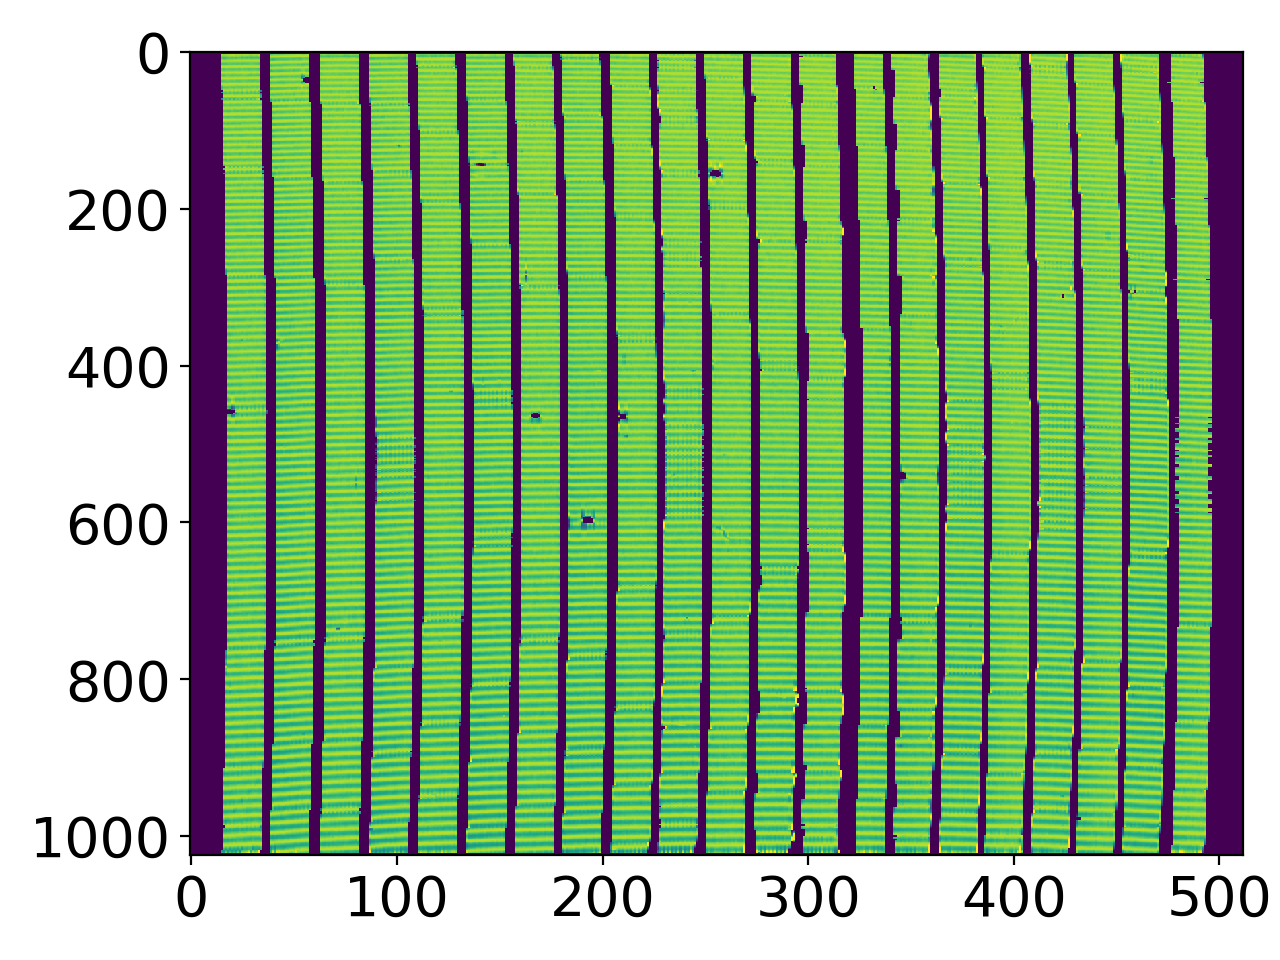

<IPython.core.display.Javascript object>


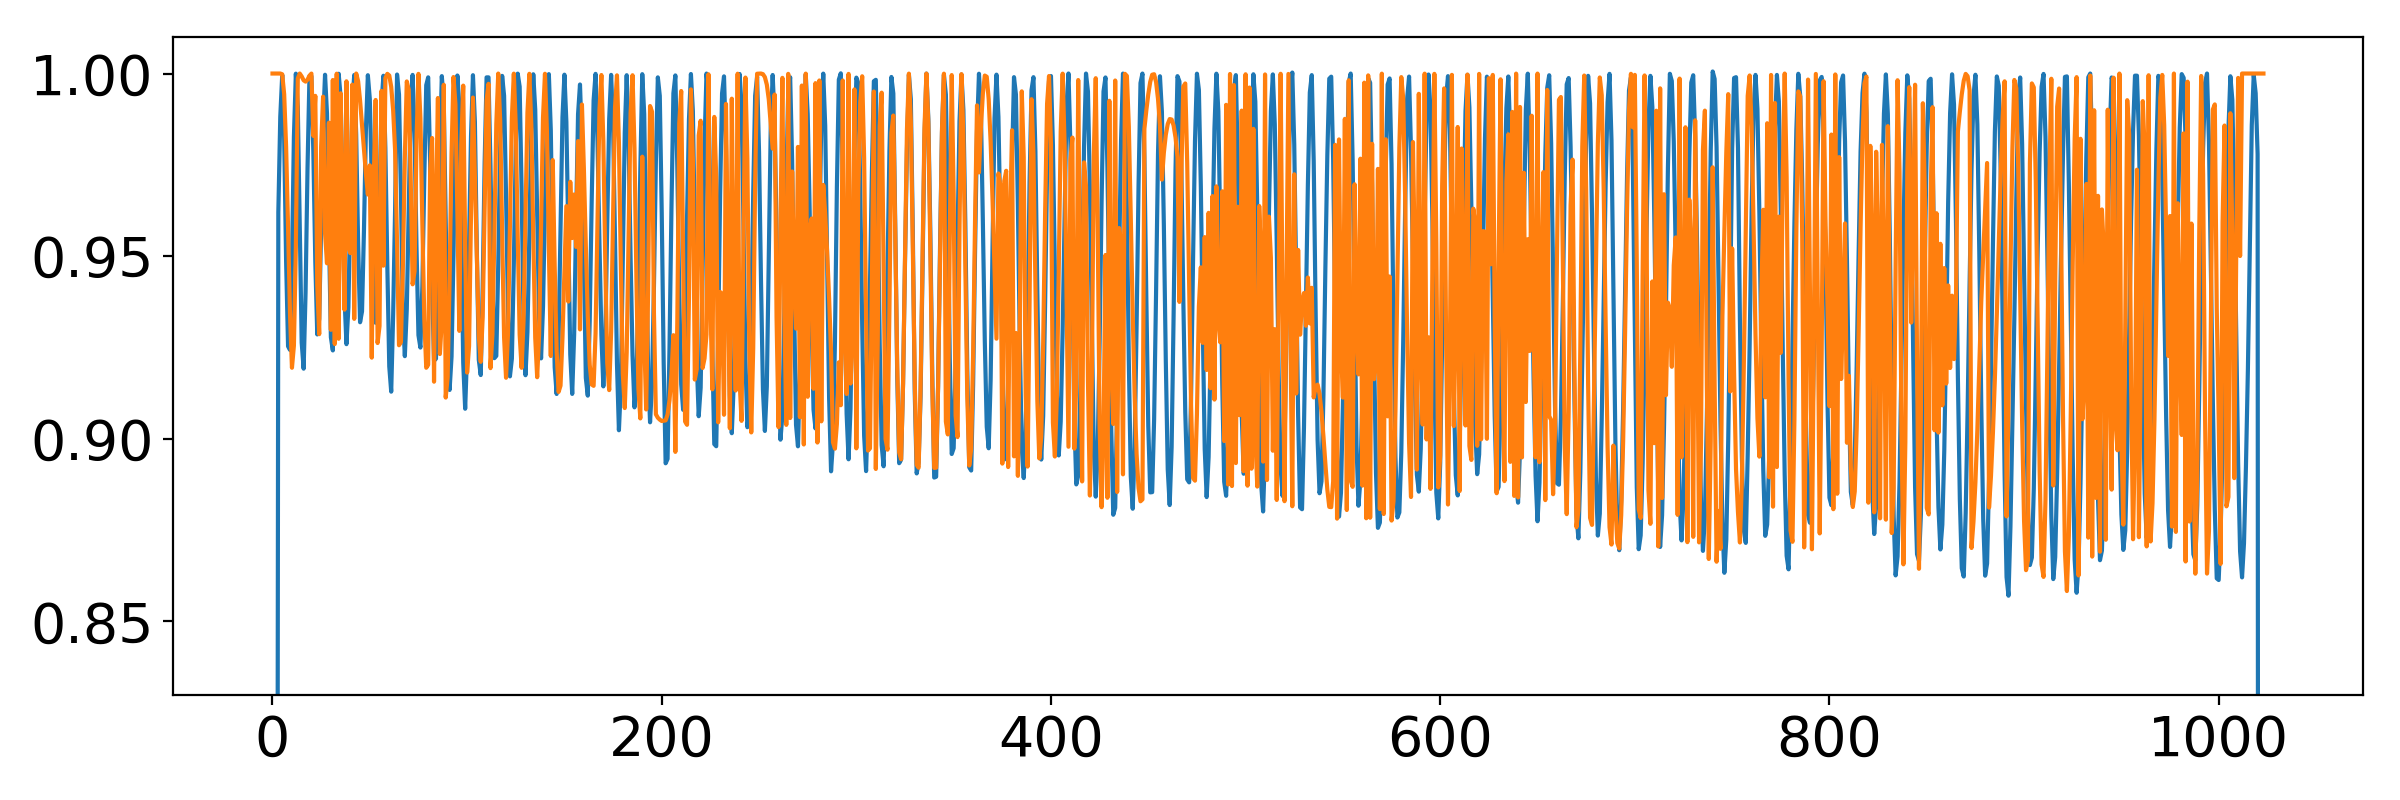

In [43]:
FP_transm_img = funcs.FPfunc_noPhaseShift(10000./lambdaMap,ext_fringe_reflectivity_img,ext_fringe_optthickness_img)

plt.figure()
plt.imshow(ext_fringe_transm_img[:,:512],vmin=0.6,vmax=1.05,aspect='auto')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(ext_fringe_transm_img[:,47])
plt.plot(FP_transm_img[:,47])
plt.ylim(0.83,1.01)
plt.tight_layout()

In [13]:
# select pointing and calibrate data
ext_fringe_transm_img = np.zeros((1024,1032))
ext_fringe_reflectivity_img = np.zeros((1024,1032))
ext_fringe_optthickness_img = np.zeros((1024,1032))
for sliceID in range(1,22):
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    for xpos_offset in range(-9,10):
        # check if xpos values makes sense via the distortion map
        sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
        xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset
        
        if sliceID in range(1,12):
            wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
        else:
            wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
        nPix = 1024.
        #----------
        signal = ext_source_oddevencorr[ypos,xpos+xpos_offset]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)
        #----------------
        norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
        
        interp_transm = scp_interpolate.interp1d(new_wvnr,norm_fringe[0]/norm_fringe[2])
        sel = (wvnr>new_wvnr.min()) & (wvnr<new_wvnr.max())
        ext_fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space
        
        
        trough_idxs = funcs.find_peaks(-(norm_fringe[0]/norm_fringe[2]),thres=0,min_dist=4*nPix/nFringes/1.6)
        reflectivity = funcs.reflectivity_from_continuum((norm_fringe[0]/norm_fringe[2])[trough_idxs])[2]
        #----------------
        # Compute zeroth order optical thickness of detector from fringe peak separation
        fringepeaks_wavenumber  = new_wvnr[norm_fringe[1]]       # cm-1
        fringetrough_wavenumber = new_wvnr[trough_idxs]
        
        interp_optthickness = scp_interpolate.interp1d(fringepeaks_wavenumber[:-1],1/(2.*np.diff(fringepeaks_wavenumber)) )
        interp_reflectivity = scp_interpolate.interp1d(fringetrough_wavenumber,reflectivity)
        sel = (wvnr>fringepeaks_wavenumber[:-1].min()) & (wvnr<fringepeaks_wavenumber[:-1].max())
        ext_fringe_optthickness_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_optthickness(wvnr[sel]))
        sel = (wvnr>fringetrough_wavenumber.min()) & (wvnr<fringetrough_wavenumber.max())
        ext_fringe_reflectivity_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_reflectivity(wvnr[sel]))

Slice 1
Slice 2
Slice 3
Slice 4
Slice 5
Slice 6
Slice 7
Slice 8
Slice 9
Slice 10
Slice 11
Slice 12
Slice 13
Slice 14
Slice 15
Slice 16
Slice 17
Slice 18
Slice 19
Slice 20
Slice 21


<IPython.core.display.Javascript object>


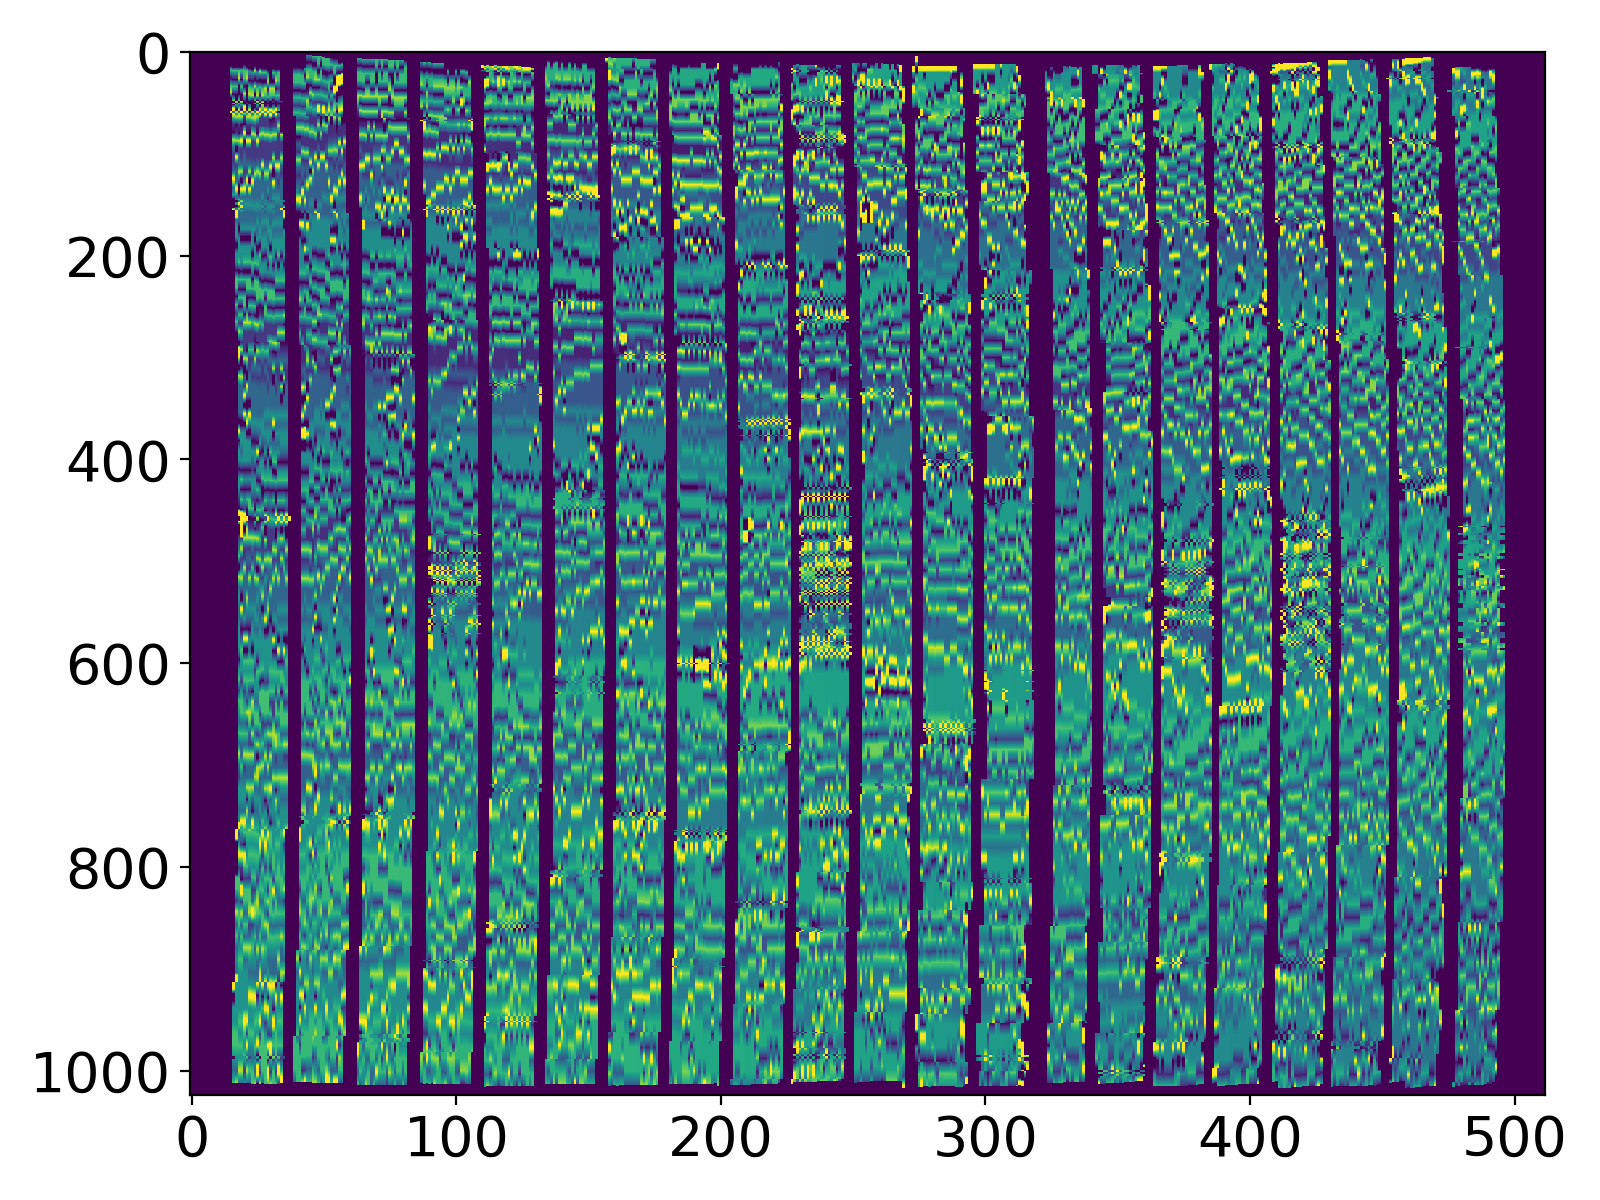

In [31]:
plt.figure(figsize=(8,6))
plt.imshow(ext_fringe_optthickness_img[:,:512]*10000.,vmin=1600,vmax=1850,aspect='auto')
# plt.imshow(ext_fringe_reflectivity_img[:,:512]*100.,vmin=0,vmax=4,aspect='auto')
plt.tight_layout()

In [15]:
# select pointing and calibrate data
intcalsource_fringe_transm_img = np.zeros((1024,1032))
intcalsource_fringe_reflectivity_img = np.zeros((1024,1032))
intcalsource_fringe_optthickness_img = np.zeros((1024,1032))
for sliceID in range(1,22):
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    for xpos_offset in range(-9,10):
        # check if xpos values makes sense via the distortion map
        sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
        xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset
        
        if sliceID in range(1,12):
            wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
        else:
            wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
        nPix = 1024.
        #----------
        signal = intcal_source_oddevencorr[ypos,xpos+xpos_offset]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)
        #----------------
        norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
        
        interp_transm = scp_interpolate.interp1d(new_wvnr,norm_fringe[0]/norm_fringe[2])
        sel = (wvnr>new_wvnr.min()) & (wvnr<new_wvnr.max())
        intcalsource_fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space
        
        trough_idxs = funcs.find_peaks(-(norm_fringe[0]/norm_fringe[2]),thres=0,min_dist=4*nPix/nFringes/1.6)
        reflectivity = funcs.reflectivity_from_continuum((norm_fringe[0]/norm_fringe[2])[trough_idxs])[2]
        #----------------
        # Compute zeroth order optical thickness of detector from fringe peak separation
        fringepeaks_wavenumber  = new_wvnr[norm_fringe[1]]       # cm-1
        fringetrough_wavenumber = new_wvnr[trough_idxs]
        
        interp_optthickness = scp_interpolate.interp1d(fringepeaks_wavenumber[:-1],1/(2.*np.diff(fringepeaks_wavenumber)) )
        interp_reflectivity = scp_interpolate.interp1d(fringetrough_wavenumber,reflectivity)
        sel = (wvnr>fringepeaks_wavenumber[:-1].min()) & (wvnr<fringepeaks_wavenumber[:-1].max())
        intcalsource_fringe_optthickness_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_optthickness(wvnr[sel]))
        sel = (wvnr>fringetrough_wavenumber.min()) & (wvnr<fringetrough_wavenumber.max())
        intcalsource_fringe_reflectivity_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_reflectivity(wvnr[sel]))

Slice 1
Slice 2
Slice 3
Slice 4
Slice 5
Slice 6
Slice 7
Slice 8
Slice 9
Slice 10
Slice 11
Slice 12
Slice 13
Slice 14
Slice 15
Slice 16
Slice 17
Slice 18
Slice 19
Slice 20
Slice 21


<IPython.core.display.Javascript object>


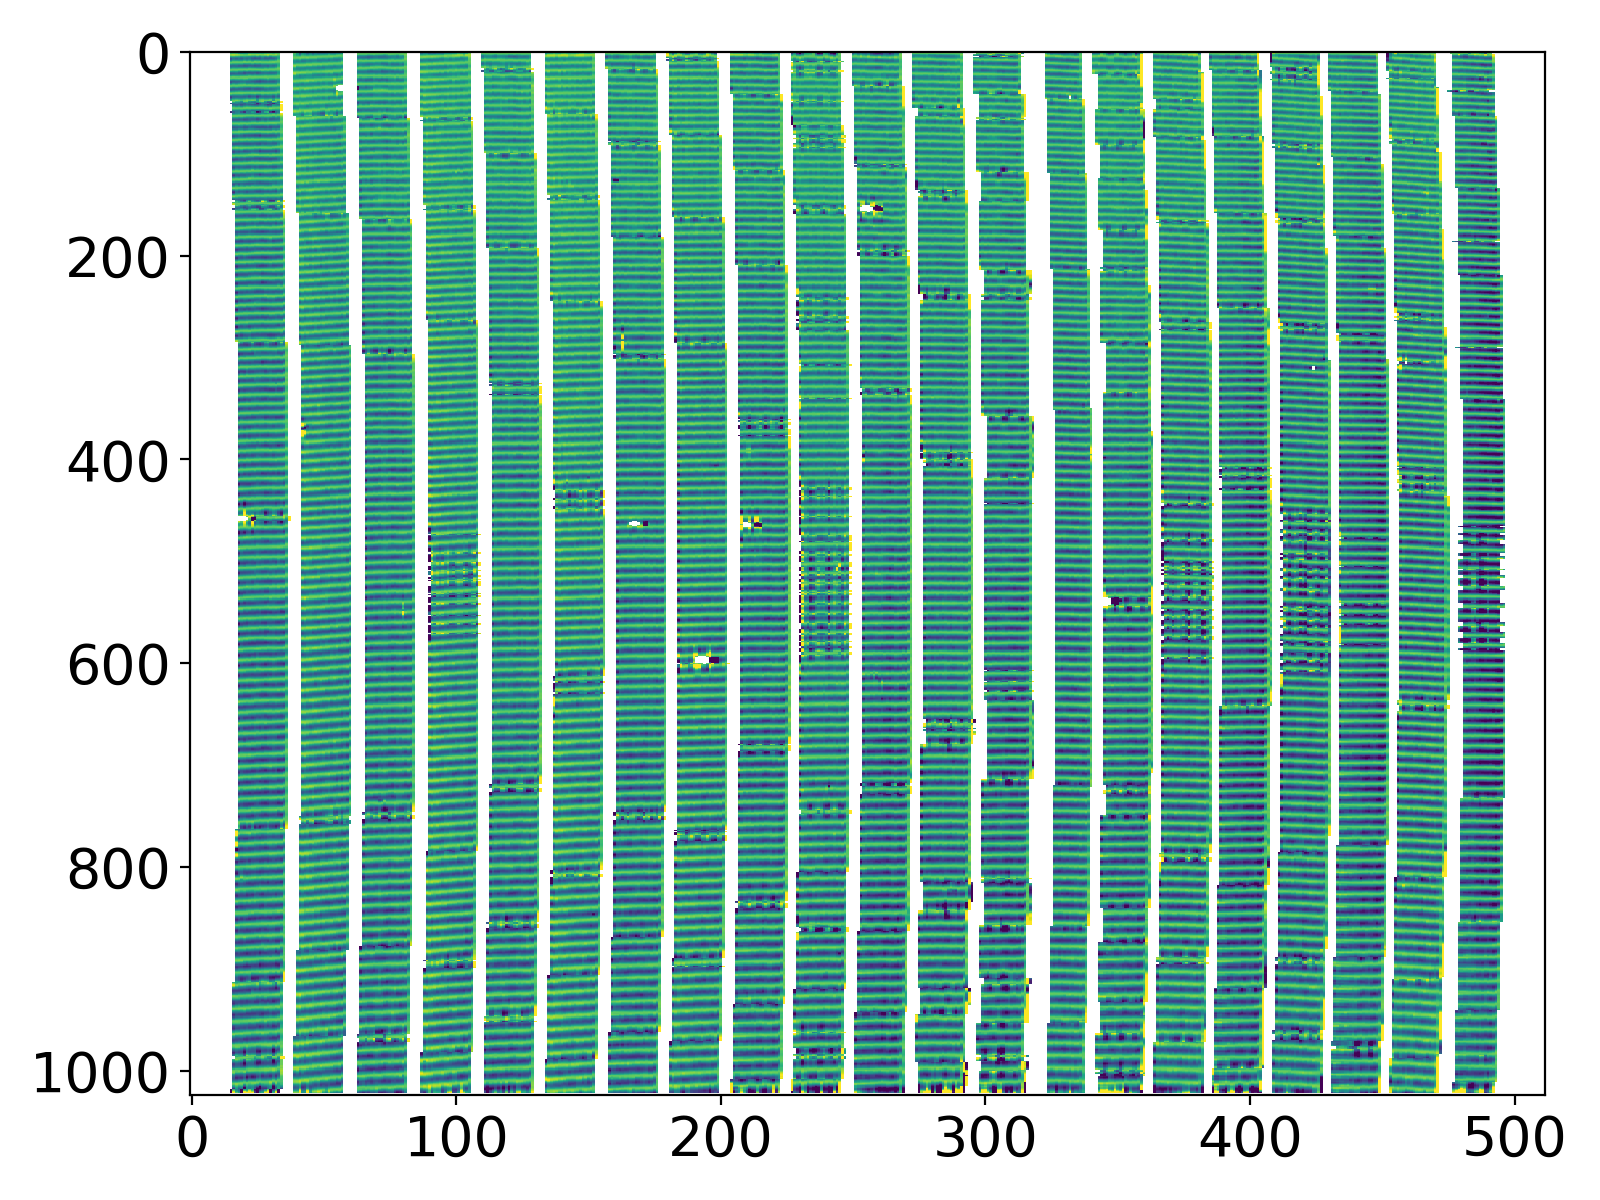

In [37]:
# plt.figure(figsize=(12,10))
# # plt.imshow(intcalsource_fringe_optthickness_img[:,:512]*10000.,vmin=1600,vmax=1850,aspect='auto')
# plt.imshow(intcalsource_fringe_reflectivity_img[:,:512]*100.,vmin=2,vmax=7,aspect='auto')
# plt.tight_layout()

plt.figure(figsize=(8,6))
plt.imshow(intcalsource_fringe_transm_img[:,:512]/ext_fringe_transm_img[:,:512],vmin=0.85,vmax=1.05,aspect='auto')
# plt.imshow(intcalsource_fringe_optthickness_img[:,:512]/ext_fringe_optthickness_img[:,:512],vmin=0.9,vmax=1.1,aspect='auto')
# plt.imshow(intcalsource_fringe_reflectivity_img[:,:512]/ext_fringe_reflectivity_img[:,:512],vmin=1,vmax=3,aspect='auto')
plt.tight_layout()

In [116]:
# # select pointing and calibrate data
# ext_fringe_transm_img = np.zeros((1024,1032))
# transm_function_img = np.zeros((1024,1032))
# reflectance_img = np.zeros((1024,1032))
# optthickness_img = np.zeros((1024,1032))
for sliceID in [17]:
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    xpos_offset = 0
    # check if xpos values makes sense via the distortion map
    sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
    xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset

    if sliceID in range(1,12):
        wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
    else:
        wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
    nPix = 1024.
    #----------
    signal = ext_source_oddevencorr[ypos,xpos+xpos_offset]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)
    #----------------
    norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
    #----------------
    fringepeaks_wavenumber     = new_wvnr[norm_fringe[1]]       # cm-1
    mean_fringepeak_separation0 = np.mean(np.diff(fringepeaks_wavenumber)[1:-1]) # omit first and last data point
    
    for xpos_offset in range(-9,10):
        print 'xpos_offset {}'.format(xpos_offset)
        # check if xpos values makes sense via the distortion map
        sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
        xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset
        
        if sliceID in range(1,12):
            wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
        else:
            wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
        nPix = 1024.
        #----------
        signal = ext_source_oddevencorr[ypos,xpos+xpos_offset]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)
        #----------------
        norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
        
        interp_transm = scp_interpolate.interp1d(new_wvnr,norm_fringe[0]/norm_fringe[2])
        sel = (wvnr>new_wvnr.min()) & (wvnr<new_wvnr.max())
        ext_fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space
        #----------------
        # Compute zeroth order optical thickness of detector from fringe peak separation
        fringepeaks_wavenumber     = new_wvnr[norm_fringe[1]]       # cm-1
        mean_fringepeak_separation = np.mean(np.diff(fringepeaks_wavenumber)[1:-1]) # omit first and last data point
        
        #----------------
        sel = np.nonzero(norm_fringe[0])
        ext_wavenumbers = new_wvnr[sel]
        ext_norm_signal = (norm_fringe[0]/norm_fringe[2])[sel]

        # define scanning window (arbitrarily set to 2*period)
        N=1
        while ext_wavenumbers[N]-ext_wavenumbers[0] < 2*mean_fringepeak_separation: N+=1
        
        # Scan fringes
        len_numerics = np.ones(20)
        ext_R,ext_D,ext_sigma_R,ext_sigma_D = [np.full(len(ext_wavenumbers),np.nan) for j in range(4)]
        
        R0,D0 = 0.10,1/(2.*mean_fringepeak_separation0)
        for i in range(len(ext_wavenumbers)-N):
            wvnr_segment = ext_wavenumbers[i: N+i].copy()
            array_segment  = ext_norm_signal[i: N+i].copy()
            
            # least-squares fitting
            try:
                popt,pcov = curve_fit(funcs.FPfunc_noPhaseShift,wvnr_segment,array_segment,p0=(R0,D0),absolute_sigma=True,method='lm')
                TR = funcs.FPfunc_noPhaseShift(wvnr_segment,*popt)

                ext_R[i: N+i] = popt[0]
                ext_D[i: N+i] = popt[1]
                ext_sigma_R[i: N+i] = np.sqrt(np.diag(pcov))[0]
                ext_sigma_D[i: N+i] = np.sqrt(np.diag(pcov))[1]

            except RuntimeError: 
                continue
        numerics = np.where(np.abs(np.diff(ext_D))*10000.>1)[0]
        len_numerics[0] = len(numerics)
        ext_R[numerics+1] = np.nan
        ext_D[numerics+1] = np.nan
        ext_sigma_R[numerics+1] = np.nan
        ext_sigma_D[numerics+1] = np.nan
        
        counter = 0
        add_D0  = 0 # um
        while len_numerics[counter]!=0:
            counter+=1
            ext_R,ext_D,ext_sigma_R,ext_sigma_D = [np.full(len(ext_wavenumbers),np.nan) for j in range(4)]
            R0,D0 = 0.10,1/(2.*mean_fringepeak_separation0) -1/10000. + add_D0
            for i in range(len(ext_wavenumbers)-N):
                wvnr_segment = ext_wavenumbers[i: N+i].copy()
                array_segment  = ext_norm_signal[i: N+i].copy()

                # least-squares fitting
                try: 
                    popt,pcov = curve_fit(funcs.FPfunc_noPhaseShift,wvnr_segment,array_segment,p0=(R0,D0),absolute_sigma=True,method='lm')
                    TR = funcs.FPfunc_noPhaseShift(wvnr_segment,*popt)

                    ext_R[i: N+i] = popt[0]
                    ext_D[i: N+i] = popt[1]
                    ext_sigma_R[i: N+i] = np.sqrt(np.diag(pcov))[0]
                    ext_sigma_D[i: N+i] = np.sqrt(np.diag(pcov))[1]

                except RuntimeError: 
                    continue
            numerics = np.where(np.abs(np.diff(ext_D))*10000.>1)[0]
            len_numerics[counter] = len(numerics)
            ext_R[numerics+1] = np.nan
            ext_D[numerics+1] = np.nan
            ext_sigma_R[numerics+1] = np.nan
            ext_sigma_D[numerics+1] = np.nan
            add_D0 += 0.1/10000.
            
            if counter == 19:
                ext_R,ext_D,ext_sigma_R,ext_sigma_D = [np.full(len(ext_wavenumbers),np.nan) for j in range(4)]
                idx = np.argmin(len_numerics)
                R0,D0 = 0.10,1/(2.*mean_fringepeak_separation0) -1/10000. + idx*add_D0
                for i in range(len(ext_wavenumbers)-N):
                    wvnr_segment = ext_wavenumbers[i: N+i].copy()
                    array_segment  = ext_norm_signal[i: N+i].copy()

                    # least-squares fitting
                    try: 
                        popt,pcov = curve_fit(funcs.FPfunc_noPhaseShift,wvnr_segment,array_segment,p0=(R0,D0),absolute_sigma=True,method='lm')
                        TR = funcs.FPfunc_noPhaseShift(wvnr_segment,*popt)

                        ext_R[i: N+i] = popt[0]
                        ext_D[i: N+i] = popt[1]
                        ext_sigma_R[i: N+i] = np.sqrt(np.diag(pcov))[0]
                        ext_sigma_D[i: N+i] = np.sqrt(np.diag(pcov))[1]

                    except RuntimeError: 
                        continue
                numerics = np.where(np.abs(np.diff(ext_D))*10000.>1)[0]
                len_numerics[counter] = 0
                ext_R[numerics+1] = np.nan
                ext_D[numerics+1] = np.nan
                ext_sigma_R[numerics+1] = np.nan
                ext_sigma_D[numerics+1] = np.nan

        #> transmittance function
        ext_TR = funcs.FPfunc_noPhaseShift(ext_wavenumbers,ext_R,ext_D)
        
        interp_transm = scp_interpolate.interp1d(ext_wavenumbers,ext_TR)
        sel = (wvnr>ext_wavenumbers.min()) & (wvnr<ext_wavenumbers.max())
        transm_function_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_transm(wvnr[sel])) # flip up-down to bring back to wavelength space
        interp_reflectance = scp_interpolate.interp1d(ext_wavenumbers,ext_R)
        interp_optthickness = scp_interpolate.interp1d(ext_wavenumbers,ext_D)
        reflectance_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_reflectance(wvnr[sel]))
        optthickness_img[ypos[sel],(xpos+xpos_offset)[sel]] = np.flipud(interp_optthickness(wvnr[sel]))
        

Slice 17
xpos_offset -9
xpos_offset -8
xpos_offset -7
xpos_offset -6
xpos_offset -5
xpos_offset -4
xpos_offset -3
xpos_offset -2
xpos_offset -1
xpos_offset 0
xpos_offset 1
xpos_offset 2
xpos_offset 3
xpos_offset 4
xpos_offset 5
xpos_offset 6
xpos_offset 7
xpos_offset 8
xpos_offset 9


<IPython.core.display.Javascript object>


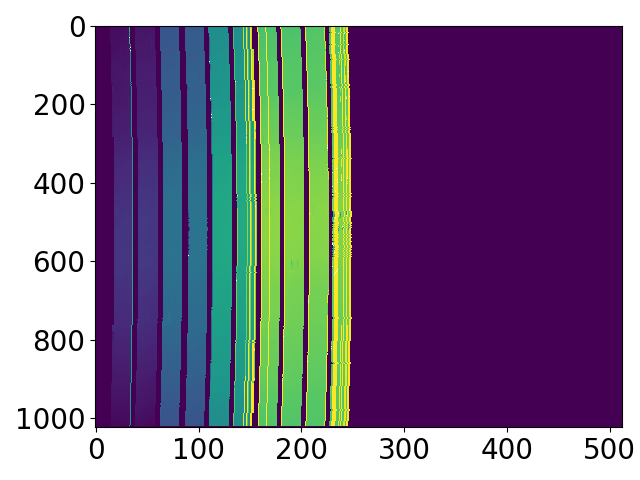

In [117]:
plt.figure()
# plt.imshow(ext_fringe_transm_img[:,:512],vmin=0.6,vmax=1.05,aspect='auto')
# plt.imshow(reflectance_img[:,:512]*100.,vmin=0,vmax=3,aspect='auto')
plt.imshow(optthickness_img[:,:512]*10000.,vmin=1706,vmax=1718,aspect='auto')
plt.tight_layout()

In [115]:
funcs.save_obj(reflectance_img,'band1Areflectance_img',path='obj/' )
funcs.save_obj(reflectance_img,'band1Aoptthickness_img',path='obj/' )

<IPython.core.display.Javascript object>


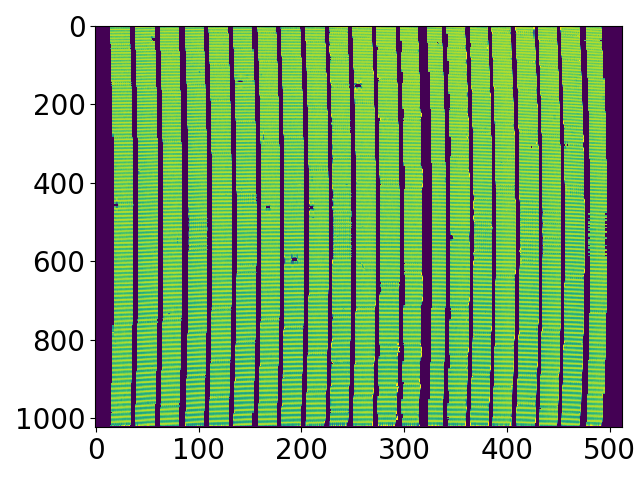

<IPython.core.display.Javascript object>


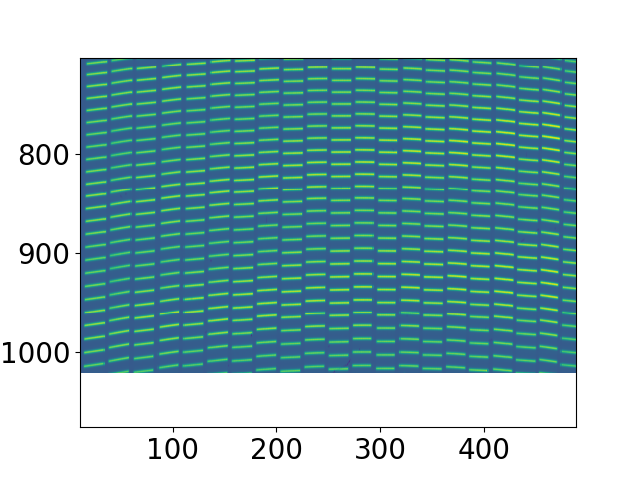

In [12]:
plt.figure()
plt.imshow(ext_fringe_transm_img[:,:512],vmin=0.6,vmax=1.05,aspect='auto')
plt.tight_layout()

plt.figure()
plt.imshow(ext_etal_source_oddevencorr[:,:512],aspect='auto')

In [95]:
mean_fringepeak_separations = []
for sliceID in [11,21,10,20,9,19,8,18,7,17,6,16,5,15,4,14,3,13,2,12,1]:
    print 'Slice {}'.format(sliceID)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=use_pointings[sliceID-1])
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=offset_slice[sliceID-1])
    
    xpos_offset = 0
    # check if xpos values makes sense via the distortion map
    sel = (np.abs(alphaMap[ypos,xpos+xpos_offset]-np.mean(alphaMap[ypos,xpos+xpos_offset]))>0.4)
    xpos[sel] = funcs.detpixel_trace(band,d2cMaps,sliceID=sliceID,alpha_pos=np.mean(alphaMap[ypos,xpos+xpos_offset]))[1][sel] - xpos_offset

    if sliceID in range(1,12):
        wavl = lambdaMap[ypos,xpos+xpos_offset] - 0.0014
    else:
        wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    nFringes = 0.1713 * 2. * (wvnr[~np.isinf(wvnr)][-1]-wvnr[~np.isinf(wvnr)][0])
    nPix = 1024.
    #----------
    signal = ext_source_oddevencorr[ypos,xpos+xpos_offset]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)
    #----------------
    norm_fringe = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=3,ext=0)
    #----------------
    fringepeaks_wavenumber     = new_wvnr[norm_fringe[1]]       # cm-1
    mean_fringepeak_separation0 = np.mean(np.diff(fringepeaks_wavenumber)[1:-1]) # omit first and last data point

    mean_fringepeak_separations.append(mean_fringepeak_separation0)

Slice 11
Slice 21
Slice 10
Slice 20
Slice 9
Slice 19
Slice 8
Slice 18
Slice 7
Slice 17
Slice 6
Slice 16
Slice 5
Slice 15
Slice 4
Slice 14
Slice 3
Slice 13
Slice 2
Slice 12
Slice 1


<IPython.core.display.Javascript object>


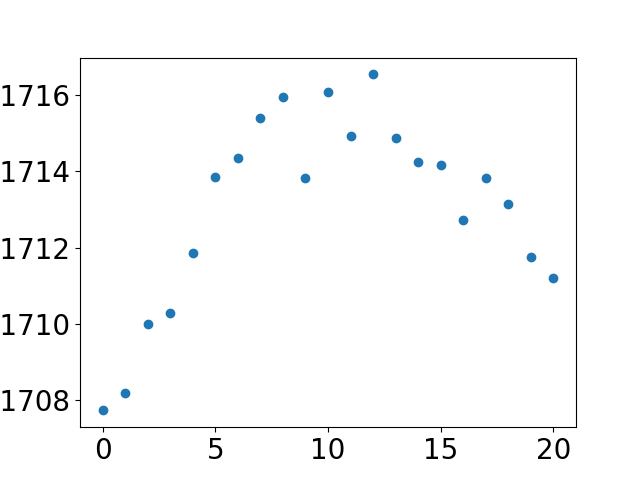

In [97]:
plt.figure()
plt.plot(1/(2.*np.array(mean_fringepeak_separations)),'o')

## Conclusions:  

## Follow-up question:  